# Principal Component Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [2]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameString          79931 non-null  object 
 1   gameDate            79931 non-null  object 
 2   visitor             79931 non-null  object 
 3   home                79931 non-null  object 
 4   inning              79931 non-null  int64  
 5   side                79931 non-null  object 
 6   balls               79931 non-null  int64  
 7   strikes             79931 non-null  int64  
 8   outs                79931 non-null  int64  
 9   batterId            79931 non-null  int64  
 10  batterName          79931 non-null  object 
 11  batterHand          79931 non-null  object 
 12  batterPosition      79931 non-null  object 
 13  pitcherId           79931 non-null  int64  
 14  pitcherName         79931 non-null  object 
 15  pitcherHand         79931 non-null  object 
 16  time

,gameString,gameDate,visitor,home,inning,side,balls,strikes,outs,batterId,batterName,batterHand,batterPosition,pitcherId,pitcherName,pitcherHand,timesFaced,catcherId,catcher,umpireId,umpire,probCalledStrike,pitchResult,pitchType,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallType,battedBallAngle,battedBallDistance,paResult
0,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,0,452655,Denard Span,L,CF,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,0.975,SL,FF,94.2,2044.22,205.477,-0.374,2.933,-6.93,8.28,NaN,NaN,NaN,NaN
1,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,0,452655,Denard Span,L,CF,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,0.745,SL,FT,97.1,1966.32,220.143,0.342,3.223,-7.48,7.35,NaN,NaN,NaN,NaN
2,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,2,0,452655,Denard Span,L,CF,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,0.968,IP,FF,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,FB,27.78,323.03,IP_OUT
3,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,0,1,605412,Joe Panik,L,2B,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,1.000,SL,FT,95.6,1947.11,198.734,-0.004,2.380,-7.24,8.40,NaN,NaN,NaN,NaN
4,gid_2016_04_04_sfnmlb_milmlb_1,2016-04-04,SF,MIL,1,T,0,1,1,605412,Joe Panik,L,2B,503449,Wily Peralta,R,1,518960,Jonathan Lucroy,427192,Brian Gorman,1.000,F,FF,95.6,1903.08,205.503,0.272,2.421,-6.79,9.37,NaN,NaN,NaN,NaN


### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [4]:
df = data.dropna()

df.isnull().sum().sort_values(ascending=False)

paResult              0
outs                  0
pitcherName           0
pitcherId             0
batterPosition        0
batterHand            0
batterName            0
batterId              0
strikes               0
timesFaced            0
balls                 0
side                  0
inning                0
home                  0
visitor               0
gameDate              0
pitcherHand           0
catcherId             0
battedBallDistance    0
spinDir               0
battedBallAngle       0
battedBallType        0
movementVert          0
movementHoriz         0
locationVert          0
locationHoriz         0
spinRate              0
catcher               0
releaseVelocity       0
pitchType             0
pitchResult           0
probCalledStrike      0
umpire                0
umpireId              0
gameString            0
dtype: int64

In [5]:
numeric = df.select_dtypes(['number'])
X = numeric.drop(['batterId', 'pitcherId', 'catcherId', 'umpireId'], axis=1)
y = df['pitchType']

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [6]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

### Compute the explained variance for new data set.

In [7]:
exp_var_ratio = pca.explained_variance_ratio_
print(exp_var_ratio)


[0.15916517 0.10825071]


### Generate a scatter plot that visualizes how the component values are distributed.

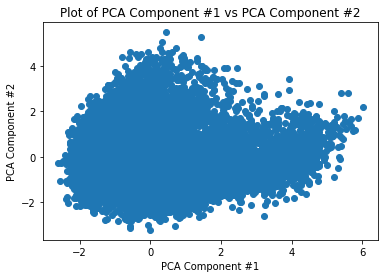

In [8]:
plt.scatter(X_pca[:, 0],X_pca[:, 1])
plt.title('Plot of PCA Component #1 vs PCA Component #2')
plt.xlabel('PCA Component #1')
plt.ylabel('PCA Component #2')
plt.show()

### Create a line plot that shows the explained variance by number of components.

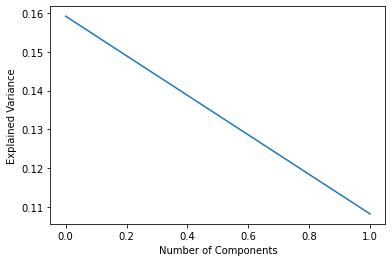

In [9]:
plt.plot(exp_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [10]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [12]:
scores = []
for i in range(2,16):
  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(X_scale)
  X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2, random_state=780)
  model = RandomForestClassifier(max_depth=4, random_state=1)
  model.fit(X_train, y_train)
  scores.append(model.score(X_pca,y))


In [13]:
scores

[0.5528352433397827,
 0.5519422533115047,
 0.5593838368804882,
 0.5633278761720494,
 0.5600535794016966,
 0.5564816192885846,
 0.5654859354070546,
 0.5875130227712457,
 0.5794761125167436,
 0.5783598749813961,
 0.5579699360023813,
 0.5477005506771842,
 0.5422681946718262,
 0.5584164310165203]

### Create a line plot that shows the training scores across the different numbers of principal components.

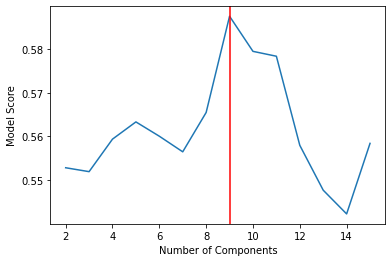

In [15]:
plt.plot(range(2,16),scores)
plt.xlabel('Number of Components')
plt.ylabel('Model Score')
plt.axvline(x = 9, color ='red') 
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

The best model score came from the model with 9 principal components. 